# IMPORTACIÓN DE LIBRERIAS

In [1]:
### Importamos Módulos Requeridos para análisis descriptivo de los datos. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#importamos las librerias adicionales necesarios para modelamiento de datos como un random forest regressor, se actualizan 
#las funciones más recientes de la libreria sklearn. 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from  sklearn.model_selection import train_test_split
from sklearn.impute  import SimpleImputer

from scipy.stats import skew

# CARGA DE BASE DE DATOS Y PRE PROCESAMIENTO DE VARIABLES

In [3]:
#cargamos bases de datos
df1 = pd.read_excel("Volumen_Energia_2009_2022.xlsx")
df2 = pd.read_excel("rpEficaciaConexionServicio.xlsx")

In [4]:
#Vemos la forma y distribución de cada dataset
df1.shape

(143498, 29)

In [5]:
df2.shape

(5248, 8)

In [6]:
df1.head()

,Año,Mes,Id Mes,Id Empresa,Empresa,Tipo Empresa,Id Central,Central,Unidad,Tipo Central,...,Nafta (gal),Gas Natural (kpc),Biogas (mpc),Crudo (gal),Residuo (gal),Bagazo (t),LPG (gal),Observaciones,Energia Entregada Servicio Publico MWh,Energia Entregada Servicio No Publico MWh
0,2009,May,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unidad fuera de servicio,NaN,NaN
1,2009,Jun,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible desde el 16 de junio,"9545,270001","2,809999"
2,2009,Jul,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"15679,420000","0,610000"
3,2009,Ago,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"16734,960000","0,450000"
4,2009,May,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"54424,348400","0,000000"


In [7]:
df2.head()

,Año,Mes,Id Empresa,Empresa,Indicador,Tipo Area,Valor Indicador,Observaciones
0,2009,Abr,20,CNEL-Bolívar,CSZR,Rural,0.6411,NaN
1,2009,Abr,20,CNEL-Bolívar,CSZU,Urbano,0.5679,NaN
2,2009,Abr,54,CNEL-El Oro,CSZR,Rural,0.9200,NaN
3,2009,Abr,54,CNEL-El Oro,CSZU,Urbano,0.9600,NaN
4,2009,Abr,72,CNEL-Esmeraldas,CSZR,Rural,0.9000,NaN


In [8]:
#se convierten en df1 y df2 los títulos de las columnas para un procesamiento más sencillo y selección de variables. 
df1.rename({'Id Mes':'Id_Mes', 'Id Empresa':'Id_Empresa', 'Tipo Empresa':'Tipo_Empresa', 'Id Central':'Id_Central', 
            'Tipo Central':'Tipo_Central', 'Subtipo Central':'Subtipo_Central', 'Tipo Energia':'Tipo_Energia', 
            'Tipo Servicio':'Tipo_Servicio', 'Energia Bruta (MWh)':'Energia_Bruta_MWh', 
            'Consumo Auxiliares Unidades (MWh)':'Consumo_Auxiliare_ Unidades_MWh', 'Energia Neta (MWh)':'Energia_Neta_MWh', 
            'FUELOIL (gal)':'FUELOIL_gal', 'Diesel2 (gal)':'Diesel2_gal', 'Nafta (gal)':'Nafta_gal', 
            'Gas Natural (kpc)':'Gas_Natural_kpc', 'Biogas (mpc)':'Biogas_mpc', 'Crudo (gal)':'Crudo_gal', 
            'Bagazo (t)':'Bagazo_t', 'LPG (gal)':'LPG_gal', 
            'Energia Entregada Servicio Publico MWh':'Energia_Entregada_Servicio_Publico_MWh', 
            'Energia Entregada Servicio No Publico MWh':'Energia_Entregada_Servicio_No_Publico_MWh'}, axis=1, inplace=True)
df2.rename({'Id Empresa':'Id_Empresa', 'Valor Indicador':'Valor_Indicador'}, axis=1, inplace=True)

# ANÁLISIS EXPLORATORIO DE VARIABLES

In [9]:
df1.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Observaciones,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
0,2009,May,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unidad fuera de servicio,NaN,NaN
1,2009,Jun,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible desde el 16 de junio,"9545,270001","2,809999"
2,2009,Jul,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"15679,420000","0,610000"
3,2009,Ago,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"16734,960000","0,450000"
4,2009,May,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"54424,348400","0,000000"


In [10]:
df2.head()

,Año,Mes,Id_Empresa,Empresa,Indicador,Tipo Area,Valor_Indicador,Observaciones
0,2009,Abr,20,CNEL-Bolívar,CSZR,Rural,0.6411,NaN
1,2009,Abr,20,CNEL-Bolívar,CSZU,Urbano,0.5679,NaN
2,2009,Abr,54,CNEL-El Oro,CSZR,Rural,0.9200,NaN
3,2009,Abr,54,CNEL-El Oro,CSZU,Urbano,0.9600,NaN
4,2009,Abr,72,CNEL-Esmeraldas,CSZR,Rural,0.9000,NaN


In [11]:
#se detallan las principales estadísticas de ambas bases de datos
df1.describe()

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal
count,143498.000000,143498.000000,143498.000000,143498.000000,143498.000000,143498.000000,1.434980e+05,1.434980e+05,1.434980e+05,143498.000000,143498.000000,1.434980e+05,1.434980e+05,143498.000000,143498.000000
mean,2016.062314,6.521708,191.146385,273.856353,2612.290626,2576.422897,2.183897e+04,1.637223e+04,2.933882e+02,2030.818795,1068.447967,8.824841e+03,3.230037e+03,128.752640,669.577450
std,3.932937,3.451817,116.219391,171.906361,10002.844257,9894.884137,2.468647e+05,1.154615e+05,2.952810e+04,20896.431861,20944.041261,4.283817e+04,3.288831e+04,2413.345492,14026.926754
min,2009.000000,1.000000,7.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2013.000000,4.000000,94.000000,123.000000,11.051500,10.891500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2016.000000,7.000000,198.000000,298.000000,200.400000,198.908502,0.000000e+00,1.050000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,2019.000000,10.000000,274.000000,398.000000,676.580416,665.449857,0.000000e+00,1.135117e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,2022.000000,12.000000,607.000000,620.000000,405420.857183,405420.857183,5.977915e+06,6.233316e+06,4.902689e+06,660000.000000,628145.130000,1.822235e+06,3.283604e+06,132237.520000,393681.660000


In [12]:
df2.describe()

,Año,Id_Empresa,Valor_Indicador
count,5248.000000,5248.000000,5248.000000
mean,2013.578125,105.611280,0.734885
std,2.956001,65.792698,0.310852
min,2009.000000,11.000000,0.000000
25%,2011.000000,35.000000,0.600000
50%,2013.000000,130.000000,0.875000
75%,2016.000000,174.000000,0.968869
max,2019.000000,193.000000,1.000000


In [13]:
# en este notebook se exploran dos opciones. La primera usar el valor de indicador de df2 para predecir el nivel de eficacia 
#del servicio usando como insumos los factores que mayor relación tienen en función de la producción de energía. 
#La segunda opción, es únicamente predecir el volumen de energía neta producida y que factores influyen para incrementar 
# el volumen mencionado. 
#Se procede a hacer un cruce entre los datos por el campo Id_Empresa para el primer escenario
columnas_criterio = ['Id_Empresa', 'Año', 'Mes', 'Empresa']

In [14]:
#reemplazo caracteres en columnas con separadores de decimlaes incorrectos
df1['Energia_Entregada_Servicio_Publico_MWh'] = df1['Energia_Entregada_Servicio_Publico_MWh'].str.replace(',', '.')
df1['Energia_Entregada_Servicio_No_Publico_MWh'] = df1['Energia_Entregada_Servicio_No_Publico_MWh'].str.replace(',', '.')
df1.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Observaciones,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
0,2009,May,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unidad fuera de servicio,NaN,NaN
1,2009,Jun,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible desde el 16 de junio,9545.270001,2.809999
2,2009,Jul,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,15679.420000,0.610000
3,2009,Ago,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,16734.960000,0.450000
4,2009,May,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,54424.348400,0.000000


In [15]:
#se transforman variables a numéricas que se observan vienen como objetos. 
df1['Consumo_Auxiliare_ Unidades_MWh'] = pd.to_numeric(df1['Consumo_Auxiliare_ Unidades_MWh'], errors='coerce')
df1['Energia_Entregada_Servicio_Publico_MWh'] = pd.to_numeric(df1['Energia_Entregada_Servicio_Publico_MWh'], errors='coerce')
df1['Energia_Entregada_Servicio_No_Publico_MWh'] = pd.to_numeric(df1['Energia_Entregada_Servicio_No_Publico_MWh'], errors='coerce')
df1.dtypes

Año                                            int64
Mes                                           object
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
Energia_Bruta_MWh                            float64
Consumo_Auxiliare_ Unidades_MWh              float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  f

In [16]:
#combino las bases para el análisis del indicador. 
df3 = pd.merge(df1, df2, on=columnas_criterio, how='inner')
df3.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,Residuo (gal),Bagazo_t,LPG_gal,Observaciones_x,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Indicador,Tipo Area,Valor_Indicador,Observaciones_y
0,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,...,0.0,0.0,0.0,"Operativo, de Emergencia.",3.1135,0.0,CSZR,Rural,0.99038,NaN
1,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,...,0.0,0.0,0.0,"Operativo, de Emergencia.",3.1135,0.0,CSZU,Urbano,0.90476,NaN
2,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,...,0.0,0.0,0.0,"Min. 18,00 Kw; Max. 29,40 Kw. Consumo de aux. ...",3.1135,0.0,CSZR,Rural,0.99038,NaN
3,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,...,0.0,0.0,0.0,"Min. 18,00 Kw; Max. 29,40 Kw. Consumo de aux. ...",3.1135,0.0,CSZU,Urbano,0.90476,NaN
4,2009,Ene,1,54,CNEL-El Oro,Distribuidora,90,Machala,G. M. #4,Térmica,...,0.0,0.0,0.0,Min. 1990 Kw; Max. 2020 Kw. Consumo de aux. im...,96.0220,0.0,CSZR,Rural,0.99038,NaN


In [17]:
#Características nuevo dataframe
df3.shape

(26732, 33)

In [18]:
df3.describe()

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Valor_Indicador
count,26732.000000,26732.000000,26732.000000,26732.000000,26732.000000,0.0,26732.000000,2.673200e+04,2.673200e+04,26732.0,26732.0,26732.0,26732.000000,26732.000000,26732.0,26732.0,25048.000000,25048.0,26732.000000
mean,2013.294703,6.316175,118.902439,144.084693,732.460599,NaN,724.960733,7.911596e+03,7.950150e+03,0.0,0.0,0.0,353.065682,106.532695,0.0,0.0,773.366447,0.0,0.833207
std,2.986285,3.500026,65.502838,93.549736,1494.694607,NaN,1476.548170,5.547024e+04,6.397111e+04,0.0,0.0,0.0,7069.646192,4389.979459,0.0,0.0,1332.204748,0.0,0.227615
min,2009.000000,1.000000,11.000000,9.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000017,0.0,0.000000
25%,2011.000000,3.000000,81.000000,95.000000,0.618000,NaN,0.580000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,73.524000,0.0,0.793100
50%,2013.000000,6.000000,142.000000,133.000000,155.276500,NaN,154.514636,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,263.619675,0.0,0.919844
75%,2016.000000,9.000000,174.000000,163.000000,787.672886,NaN,777.622994,0.000000e+00,5.463670e+02,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,951.598857,0.0,0.982196
max,2019.000000,12.000000,193.000000,584.000000,26187.693797,NaN,25877.035660,1.582078e+06,1.913923e+06,0.0,0.0,0.0,214904.000000,216891.900000,0.0,0.0,20107.388203,0.0,1.000000


In [19]:
#valoramos si existen valores perdidos en columnas. De aquí los data frames a usar serían df1 y df3 
df1.isna().sum()

Año                                               0
Mes                                               0
Id_Mes                                            0
Id_Empresa                                        0
Empresa                                           0
Tipo_Empresa                                      0
Id_Central                                        0
Central                                           0
Unidad                                            0
Tipo_Central                                      0
Subtipo_Central                                   0
Tipo_Energia                                      0
Tipo_Servicio                                     0
Sistema                                           0
Energia_Bruta_MWh                                 0
Consumo_Auxiliare_ Unidades_MWh              143498
Energia_Neta_MWh                                  0
FUELOIL_gal                                       0
Diesel2_gal                                       0
Nafta_gal   

In [20]:
df3.isna().sum()

Año                                              0
Mes                                              0
Id_Mes                                           0
Id_Empresa                                       0
Empresa                                          0
Tipo_Empresa                                     0
Id_Central                                       0
Central                                          0
Unidad                                           0
Tipo_Central                                     0
Subtipo_Central                                  0
Tipo_Energia                                     0
Tipo_Servicio                                    0
Sistema                                          0
Energia_Bruta_MWh                                0
Consumo_Auxiliare_ Unidades_MWh              26732
Energia_Neta_MWh                                 0
FUELOIL_gal                                      0
Diesel2_gal                                      0
Nafta_gal                      

In [21]:
#la columna de observaciones no se va a usar en el análisis para ninguno de los modelos, por tanto se procede a retirarla. 
df1 = df1.drop("Observaciones", axis =1)
df1.isna().sum()

Año                                               0
Mes                                               0
Id_Mes                                            0
Id_Empresa                                        0
Empresa                                           0
Tipo_Empresa                                      0
Id_Central                                        0
Central                                           0
Unidad                                            0
Tipo_Central                                      0
Subtipo_Central                                   0
Tipo_Energia                                      0
Tipo_Servicio                                     0
Sistema                                           0
Energia_Bruta_MWh                                 0
Consumo_Auxiliare_ Unidades_MWh              143498
Energia_Neta_MWh                                  0
FUELOIL_gal                                       0
Diesel2_gal                                       0
Nafta_gal   

In [22]:
df3 = df3.drop("Observaciones_x", axis =1)
df3 = df3.drop("Observaciones_y", axis =1)
df3.isna().sum()

Año                                              0
Mes                                              0
Id_Mes                                           0
Id_Empresa                                       0
Empresa                                          0
Tipo_Empresa                                     0
Id_Central                                       0
Central                                          0
Unidad                                           0
Tipo_Central                                     0
Subtipo_Central                                  0
Tipo_Energia                                     0
Tipo_Servicio                                    0
Sistema                                          0
Energia_Bruta_MWh                                0
Consumo_Auxiliare_ Unidades_MWh              26732
Energia_Neta_MWh                                 0
FUELOIL_gal                                      0
Diesel2_gal                                      0
Nafta_gal                      

In [23]:
#se procede a reemplazar los valores nulos por cero, dado que lo mismo refleja en el diccionario de datos. 
df1 = df1.fillna(0)
df3 = df3.fillna(0)

In [24]:
df1.isna().sum()

Año                                          0
Mes                                          0
Id_Mes                                       0
Id_Empresa                                   0
Empresa                                      0
Tipo_Empresa                                 0
Id_Central                                   0
Central                                      0
Unidad                                       0
Tipo_Central                                 0
Subtipo_Central                              0
Tipo_Energia                                 0
Tipo_Servicio                                0
Sistema                                      0
Energia_Bruta_MWh                            0
Consumo_Auxiliare_ Unidades_MWh              0
Energia_Neta_MWh                             0
FUELOIL_gal                                  0
Diesel2_gal                                  0
Nafta_gal                                    0
Gas_Natural_kpc                              0
Biogas_mpc   

In [25]:
df3.isna().sum()

Año                                          0
Mes                                          0
Id_Mes                                       0
Id_Empresa                                   0
Empresa                                      0
Tipo_Empresa                                 0
Id_Central                                   0
Central                                      0
Unidad                                       0
Tipo_Central                                 0
Subtipo_Central                              0
Tipo_Energia                                 0
Tipo_Servicio                                0
Sistema                                      0
Energia_Bruta_MWh                            0
Consumo_Auxiliare_ Unidades_MWh              0
Energia_Neta_MWh                             0
FUELOIL_gal                                  0
Diesel2_gal                                  0
Nafta_gal                                    0
Gas_Natural_kpc                              0
Biogas_mpc   

In [26]:
df1.dtypes

Año                                            int64
Mes                                           object
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
Energia_Bruta_MWh                            float64
Consumo_Auxiliare_ Unidades_MWh              float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  f

In [27]:
df3.dtypes

Año                                            int64
Mes                                           object
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
Energia_Bruta_MWh                            float64
Consumo_Auxiliare_ Unidades_MWh              float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  f

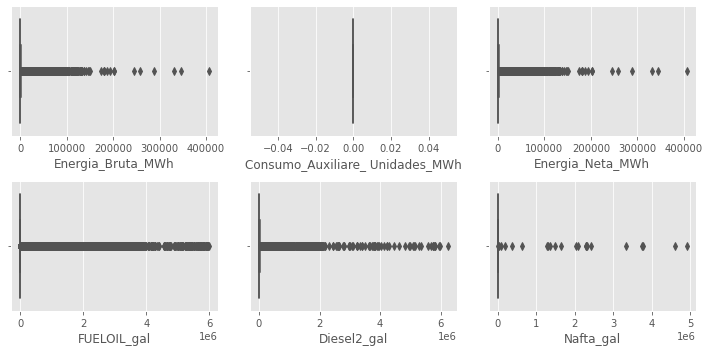

In [28]:
# se obtienen box plots con la finalidad de bucar outliers y validar en caso de que sea necersario eliminar 
#alguna variable del análisis df1

fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df1['Energia_Bruta_MWh'], ax = axs[0,0])
plt2 = sns.boxplot(df1['Consumo_Auxiliare_ Unidades_MWh'], ax = axs[0,1])
plt3 = sns.boxplot(df1['Energia_Neta_MWh'], ax = axs[0,2])
plt1 = sns.boxplot(df1['FUELOIL_gal'], ax = axs[1,0])
plt2 = sns.boxplot(df1['Diesel2_gal'], ax = axs[1,1])
plt3 = sns.boxplot(df1['Nafta_gal'], ax = axs[1,2])



plt.tight_layout()

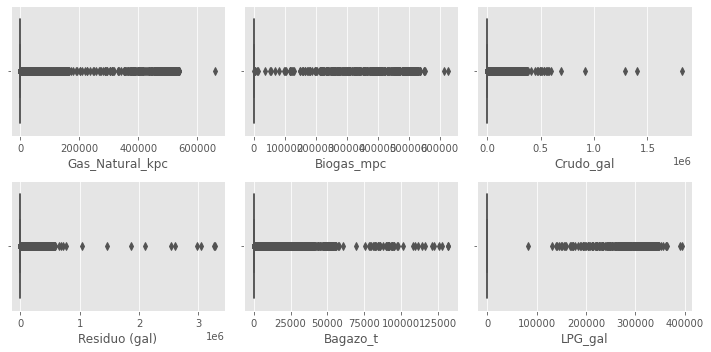

In [29]:
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df1['Gas_Natural_kpc'], ax = axs[0,0])
plt2 = sns.boxplot(df1['Biogas_mpc'], ax = axs[0,1])
plt3 = sns.boxplot(df1['Crudo_gal'], ax = axs[0,2])
plt1 = sns.boxplot(df1['Residuo (gal)'], ax = axs[1,0])
plt2 = sns.boxplot(df1['Bagazo_t'], ax = axs[1,1])
plt3 = sns.boxplot(df1['LPG_gal'], ax = axs[1,2])


plt.tight_layout()

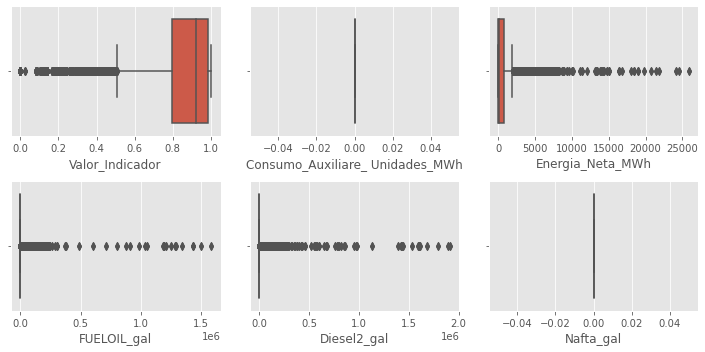

In [30]:
# se obtienen box plots con la finalidad de bucar outliers y validar en caso de que sea necersario eliminar 
#alguna variable del análisis df3
#Como se ve, en ambos dataframes, se tienen muchos outliers, al usar un módelo robusto como es el random forest, no se procede
#con la eliminación de outliers. 

fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df3['Valor_Indicador'], ax = axs[0,0])
plt2 = sns.boxplot(df3['Consumo_Auxiliare_ Unidades_MWh'], ax = axs[0,1])
plt3 = sns.boxplot(df3['Energia_Neta_MWh'], ax = axs[0,2])
plt1 = sns.boxplot(df3['FUELOIL_gal'], ax = axs[1,0])
plt2 = sns.boxplot(df3['Diesel2_gal'], ax = axs[1,1])
plt3 = sns.boxplot(df3['Nafta_gal'], ax = axs[1,2])



plt.tight_layout()

<AxesSubplot:xlabel='Energia_Neta_MWh', ylabel='Density'>

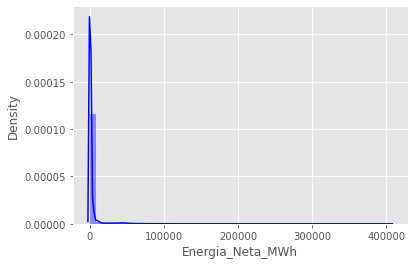

In [31]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe
sns.distplot(df1['Energia_Neta_MWh'],color="blue")

<AxesSubplot:xlabel='Energia_Bruta_MWh', ylabel='Density'>

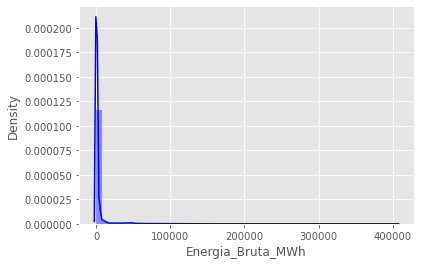

In [32]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe
sns.distplot(df1['Energia_Bruta_MWh'],color="blue")

<AxesSubplot:xlabel='Consumo_Auxiliare_ Unidades_MWh', ylabel='Density'>

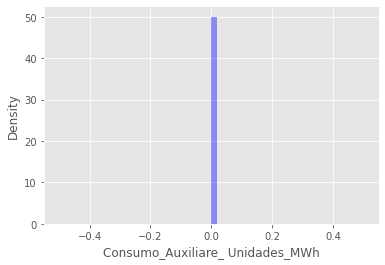

In [33]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe
sns.distplot(df1['Consumo_Auxiliare_ Unidades_MWh'],color="blue")

<AxesSubplot:xlabel='Valor_Indicador', ylabel='Density'>

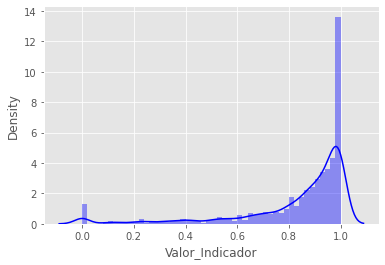

In [34]:
#para el dataframe3
sns.distplot(df3['Valor_Indicador'],color="blue")

In [35]:
#vamos a ver la correlación entre als variables de cada dataframe
df1.corr().style.background_gradient(cmap='coolwarm')

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
Año,1.000000,-0.000982,0.209823,0.278314,0.007429,nan,0.008304,-0.034968,-0.049833,-0.014532,-0.022956,0.043975,0.024916,-0.049188,-0.000073,-0.009047,0.002728,0.052627
Id_Mes,-0.000982,1.000000,0.005900,0.010006,-0.000078,nan,-0.000116,0.001357,0.006701,-0.001663,-0.000515,0.002452,0.005234,0.003741,0.041660,-0.000711,-0.001642,0.013895
Id_Empresa,0.209823,0.005900,1.000000,0.490163,-0.037657,nan,-0.036285,-0.043726,-0.036614,0.003065,-0.025723,0.119130,-0.023403,-0.047157,-0.041052,-0.073171,-0.040383,0.027457
Id_Central,0.278314,0.010006,0.490163,1.000000,-0.042743,nan,-0.041063,-0.057426,-0.018104,0.001453,-0.041720,0.078495,-0.071734,-0.041412,-0.053262,-0.012458,-0.036021,-0.062066
Energia_Bruta_MWh,0.007429,-0.000078,-0.037657,-0.042743,1.000000,nan,0.999730,0.360680,0.117763,0.037668,0.156460,-0.009851,0.018264,0.032037,0.052948,-0.002450,0.953111,0.033291
Consumo_Auxiliare_ Unidades_MWh,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Energia_Neta_MWh,0.008304,-0.000116,-0.036285,-0.041063,0.999730,nan,1.000000,0.342481,0.116807,0.037979,0.154435,-0.009843,0.017136,0.030542,0.052200,-0.002524,0.952998,0.033082
FUELOIL_gal,-0.034968,0.001357,-0.043726,-0.057426,0.360680,nan,0.342481,1.000000,0.008079,-0.000879,-0.008592,-0.004513,-0.018214,-0.008524,-0.004720,-0.004221,0.346069,-0.029641
Diesel2_gal,-0.049833,0.006701,-0.036614,-0.018104,0.117763,nan,0.116807,0.008079,1.000000,0.055347,-0.007790,-0.007234,-0.026127,0.011836,-0.007565,-0.005121,0.099482,0.131753
Nafta_gal,-0.014532,-0.001663,0.003065,0.001453,0.037668,nan,0.037979,-0.000879,0.055347,1.000000,-0.000966,-0.000507,-0.002047,-0.000976,-0.000530,-0.000474,0.039994,-0.003909


In [36]:
#vamos a ver la correlación entre als variables de cada dataframe
#Al tener una alta correlación entre variables predictoras, así como una alta dispersión en los datos y no tener distribución
#normales en las variables, y ser una variable continua, se obta por un modelo de regresión más robusto que los tradicionales
#por ese motivo el modelo a usar es el de un random forest regressor. 
df3.corr().style.background_gradient(cmap='coolwarm')

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Valor_Indicador
Año,1.000000,-0.045630,-0.085519,0.309477,0.018640,nan,0.019375,0.019968,0.000918,nan,nan,nan,-0.063062,-0.018648,nan,nan,0.021780,nan,0.056202
Id_Mes,-0.045630,1.000000,-0.019851,0.008407,-0.017197,nan,-0.017936,0.014999,0.023922,nan,nan,nan,0.003558,-0.023170,nan,nan,-0.020333,nan,0.073607
Id_Empresa,-0.085519,-0.019851,1.000000,-0.075401,0.200394,nan,0.200565,0.044258,-0.072342,nan,nan,nan,0.055734,0.027082,nan,nan,0.227397,nan,-0.002040
Id_Central,0.309477,0.008407,-0.075401,1.000000,-0.073606,nan,-0.074264,-0.002341,-0.002109,nan,nan,nan,-0.016595,-0.008064,nan,nan,-0.084536,nan,-0.023583
Energia_Bruta_MWh,0.018640,-0.017197,0.200394,-0.073606,1.000000,nan,0.999832,0.425641,0.480174,nan,nan,nan,0.056695,0.036934,nan,nan,0.882764,nan,-0.006739
Consumo_Auxiliare_ Unidades_MWh,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Energia_Neta_MWh,0.019375,-0.017936,0.200565,-0.074264,0.999832,nan,1.000000,0.416020,0.477185,nan,nan,nan,0.055450,0.036207,nan,nan,0.882480,nan,-0.005461
FUELOIL_gal,0.019968,0.014999,0.044258,-0.002341,0.425641,nan,0.416020,1.000000,-0.013228,nan,nan,nan,-0.007123,-0.003461,nan,nan,0.427685,nan,-0.035448
Diesel2_gal,0.000918,0.023922,-0.072342,-0.002109,0.480174,nan,0.477185,-0.013228,1.000000,nan,nan,nan,0.000616,-0.002068,nan,nan,0.416906,nan,-0.125317
Nafta_gal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# DEFINICIÓN DE VARIABLE OBJETIVO Y VARIABLES PREDICTORAS

In [37]:
#Declaración de las variables dependientes e independientes. Se retira la variable "Consumo de energía auxiliares" por no 
#tener relación con ninguna variable en ninguna de las dos bases
#Creo conjuntos para base 1
#expulso el mes para usar únicamente la columna ID_MES, también se retira la energía bruta, al tener una relación directa
#con la variable a predecir. 
X1 = df1.drop(['Consumo_Auxiliare_ Unidades_MWh', 'Mes', 'Energia_Neta_MWh', 'Energia_Bruta_MWh'], axis=1)
Y1 = df1['Energia_Neta_MWh']

In [38]:
#Creo variables para conjunto de dats 2
X3 = df3.drop(['Consumo_Auxiliare_ Unidades_MWh', 'Mes', 'Valor_Indicador'], axis=1)
Y3 = df3['Valor_Indicador']

In [39]:
#visualizo la forma de las variables
X1.head()

,Año,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,Subtipo_Central,...,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
0,2009,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,Térmica Turbogas,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2009,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,Térmica Turbogas,...,906926.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9545.270001,2.809999
2,2009,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,Térmica Turbogas,...,1440890.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15679.420000,0.610000
3,2009,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,Térmica Turbogas,...,1491300.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16734.960000,0.450000
4,2009,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,Hidráulica,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54424.348400,0.000000


In [40]:
#visualizo la forma de las variables
Y1.head()

0        0.000000
1     9548.080000
2    15680.030000
3    16735.410000
4    43427.380508
Name: Energia_Neta_MWh, dtype: float64

In [41]:
Y1.dtypes

dtype('float64')

In [42]:
#visualizo la forma de las variables
X3.head()

,Año,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,Subtipo_Central,...,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Indicador,Tipo Area
0,2009,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,Térmica MCI,...,0.0,0.0,0.0,0.0,0.0,0.0,3.1135,0.0,CSZR,Rural
1,2009,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,Térmica MCI,...,0.0,0.0,0.0,0.0,0.0,0.0,3.1135,0.0,CSZU,Urbano
2,2009,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,Térmica MCI,...,0.0,0.0,0.0,0.0,0.0,0.0,3.1135,0.0,CSZR,Rural
3,2009,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,Térmica MCI,...,0.0,0.0,0.0,0.0,0.0,0.0,3.1135,0.0,CSZU,Urbano
4,2009,1,54,CNEL-El Oro,Distribuidora,90,Machala,G. M. #4,Térmica,Térmica MCI,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0220,0.0,CSZR,Rural


In [43]:
#visualizo la forma de las variables
Y3.head()

0    0.99038
1    0.90476
2    0.99038
3    0.90476
4    0.99038
Name: Valor_Indicador, dtype: float64

# CONFORMACIÓN DE CONJUNTO DE ENTRENAMIENTO Y PRUEBA

In [44]:
# se dividen los dataset en partes independientes para realizar el entrenamiento
#importamos libreria
from sklearn.model_selection import train_test_split

In [45]:
#división de conjuntos de entrenamiento y prueba base 1. Usamos el parámetro random state en 42 para controlar la aleatriedad
#del modelo al dividir los conjuntos de datos, por el volumen que mantenemos de información. Aunque esto no debería generar un
#impacto significativo en el modelo. Se usa 70% de los datos para entrenamiento y 30% para prueba
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 42)

In [46]:
#Revisamos la forma de los nuevos conjuntos independientes para validar que aplique la distribución de los parámetros. 
X1_train.shape, X1_test.shape

((100448, 24), (43050, 24))

In [47]:
#Replicamos para el conjunto de datos 3
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.3, random_state = 42)

In [48]:
#Revisamos la forma de los nuevos conjuntos independientes para validar que aplique la distribución de los parámetros. 
X3_train.shape, X3_test.shape

((18712, 28), (8020, 28))

# FEATURE ENGINEERING 

In [49]:
#Feature Engineering reviso nuevamente los tipos de variables en los conjuntos de prueba y entrenamiento
X1_train.dtypes

Año                                            int64
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              float64
Biogas_mpc                                   float64
Crudo_gal                                    f

In [50]:
X3_train.dtypes

Año                                            int64
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
Energia_Bruta_MWh                            float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              f

In [51]:
#se procede a codificar las variables categoricas (proceso de dumificación)
#Importo módulo para hacerlo mediante category encoders. 
!pip install category_encoders

In [52]:
#Importo libreria para feature de variables. 
import category_encoders as ce

In [53]:
#codifico variables categóricas de forma ordinal.
encoder_1 = ce.OrdinalEncoder(cols=['Empresa', 'Tipo_Empresa', 'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 
                                    'Tipo_Energia', 'Tipo_Servicio', 'Sistema'])
encoder_3 = ce.OrdinalEncoder(cols=['Empresa', 'Tipo_Empresa', 'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 
                                    'Tipo_Energia', 'Tipo_Servicio', 'Sistema', 'Empresa', 'Indicador', 'Tipo Area'])

In [54]:
#dummyfico variables usando encoder en ambos conjuntos de datos. 

X1_train = encoder_1.fit_transform(X1_train)

X1_test = encoder_1.transform(X1_test)

In [55]:
X3_train = encoder_3.fit_transform(X3_train)

X3_test = encoder_3.transform(X3_test)

In [56]:
#Validamos como quedaron las variables una vez dummyficadas
X1_train.head()

,Año,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,Subtipo_Central,...,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
15576,2010,12,98,1,1,360,1,1,1,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29561.350171,0.000000
19064,2011,6,61,2,1,139,2,1,2,2,...,356263.604563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2327.101044,0.000000
57400,2015,9,274,3,2,340,3,2,2,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1864.090467
31640,2012,5,13,4,2,381,4,3,2,3,...,10692.987246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,191.715000
103957,2019,8,55,5,1,29,5,1,1,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2228.727446,0.000000


In [57]:
X1_test.head()

,Año,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,Subtipo_Central,...,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
115921,2020,12,95,78,1,120,245.0,933.0,1,1,...,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,92.610000,0.0000
107797,2019,2,200,6,1,34,34.0,1277.0,2,3,...,45809.236780,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,267.498590,0.0000
86359,2018,10,274,3,2,558,155.0,639.0,2,3,...,0.000000,0.0,7350.52,0.0,0.0,0.000000,0.0,0.0,0.000000,373.2225
41068,2013,1,55,5,1,141,12.0,9.0,2,3,...,8563.871329,0.0,0.00,0.0,0.0,134698.488091,0.0,0.0,2169.999250,0.0000
105045,2019,10,81,8,3,397,283.0,433.0,4,5,...,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.154667,0.0000


In [58]:
X1_train.dtypes

Año                                            int64
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                        int32
Tipo_Empresa                                   int32
Id_Central                                     int64
Central                                        int32
Unidad                                         int32
Tipo_Central                                   int32
Subtipo_Central                                int32
Tipo_Energia                                   int32
Tipo_Servicio                                  int32
Sistema                                        int32
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              float64
Biogas_mpc                                   float64
Crudo_gal                                    f

In [59]:
X1_test.dtypes

Año                                            int64
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                        int32
Tipo_Empresa                                   int32
Id_Central                                     int64
Central                                      float64
Unidad                                       float64
Tipo_Central                                   int32
Subtipo_Central                                int32
Tipo_Energia                                   int32
Tipo_Servicio                                  int32
Sistema                                        int32
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              float64
Biogas_mpc                                   float64
Crudo_gal                                    f

In [60]:
X3_train.head()

,Año,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,Subtipo_Central,...,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Indicador,Tipo Area
14684,2014,7,81,-1.0,1,135,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,5.845667,0.0,1,1
24313,2018,11,193,-1.0,1,163,2,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.574171,0.0,2,2
12065,2013,5,81,-1.0,1,34,3,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,235.280333,0.0,2,2
5352,2010,11,54,-1.0,1,151,4,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2.340500,0.0,1,1
14711,2014,6,35,-1.0,1,176,5,5,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,30.380500,0.0,2,2


In [61]:
X3_test.head()

,Año,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,Subtipo_Central,...,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Indicador,Tipo Area
12407,2013,3,174,-1.0,1,148,13,9,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,3465.644866,0.0,2,2
13967,2013,7,142,-1.0,1,178,6,11,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,762.815074,0.0,2,2
25288,2018,8,11,-1.0,1,582,38,43,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,2.232000,0.0,1,1
13848,2013,11,35,-1.0,1,121,45,27,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1056.356500,0.0,1,1
4659,2010,6,174,-1.0,1,95,9,19,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,615.219590,0.0,2,2


In [62]:
X3_train.dtypes

Año                                            int64
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                      float64
Tipo_Empresa                                   int32
Id_Central                                     int64
Central                                        int32
Unidad                                         int32
Tipo_Central                                   int32
Subtipo_Central                                int32
Tipo_Energia                                   int32
Tipo_Servicio                                  int32
Sistema                                        int32
Energia_Bruta_MWh                            float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              f

In [63]:
X3_test.dtypes

Año                                            int64
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                      float64
Tipo_Empresa                                   int32
Id_Central                                     int64
Central                                        int32
Unidad                                         int32
Tipo_Central                                   int32
Subtipo_Central                                int32
Tipo_Energia                                   int32
Tipo_Servicio                                  int32
Sistema                                        int32
Energia_Bruta_MWh                            float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              f

# SE INTRODUCE EL MODELO RANDOM FOREST REGRESSOR

In [64]:
#DE SKLEARN IMPORTO LA LIBRERÍA PARA EL RANDOM CLASIFFIER. SE USA UN MODELAMIENTO PARA CADA CONJUNTO DE DATOS, CON LOS 
#PARÁMETROS POR DEFECTO QUE USA EL REGRESOR
from sklearn.ensemble import RandomForestRegressor

In [65]:
#INSTANCIO EL REGRESOR, UNO POR CADA CONJUNTO
rf_regressor_1 = RandomForestRegressor()

In [66]:
#INSTANCIO EL REGRESOR, UNO POR CADA CONJUNTO
rf_regressor_3 = RandomForestRegressor()

In [67]:
#AJUSTO EL MODELO PARA EL CONJUNTO 1
rf_regressor_1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [68]:
#AJUSTO EL MODELO PARA EL CONJUNTO 3
rf_regressor_3.fit(X3_train, Y3_train)

RandomForestRegressor()

# PREDICCIÓN DEL RESULTADO PARA AMBOS CONJUNTOS DE DATOS

In [69]:
Y1_pred = rf_regressor_1.predict(X1_test)
#visualizamos las predicciones
Y1_pred

array([ 256.6537    ,  619.00098579,  503.95091162, ...,  868.10824136,
       2993.96453346,   73.8873298 ])

In [70]:
Y3_pred = rf_regressor_3.predict(X3_test)
#visualizamos las predicciones
Y3_pred

array([0.8811011 , 0.9445    , 0.830025  , ..., 0.74944138, 0.922306  ,
       0.9390988 ])

# SE PROCEDE A REALIZAR EL SCORING DEL MODELO DE REGRESIÓN Y A MEDIR LA PRECISIÓN DEL MISMO

In [71]:
#Para el scoring del modelo, se usan las técnicas para evaluar regresión que son el error absoluto medio y el coeficiente 
#de determinación, considerando que se tienen muchos datos atípicos y los otros esquemas tienen una alta sensibilidad a ellos. 
from sklearn.metrics import mean_absolute_error, r2_score

In [72]:
#Error absoluto medio para el conjunto 1 de predicciones. 
#Se tiene un error absoluto medio bastante elevado, sin embargo al considerar el grado de precisión del modelo, aún se podría usar
#para ejecutar predicciones con cierto grado de confiabilidad. 
mae_1 = mean_absolute_error(Y1_test, Y1_pred)
print('El error absoluto medio es: ', mae_1)

El error absoluto medio es:  355.1720945180187


In [73]:
#Cálculamos el coeficiente de determinación para el conjunto 1. 
#Se tienen excelentes resultados, la variabilidad de los datos se explica por el modelo en un 92,46% Es decir que tiene una 
#precisión de superior al 90% del modelo, pero inferior al 95%, por tanto es necesario ver que factores son los más importantes, 
#para esa forma ajustar el modelo y tener una mejor precisión, además de ver que aspectos influyen mayormente en el volumen neto
#de energía. 
r2_1 = r2_score(Y1_test, Y1_pred)
print('El coeficiente de determinación es: ', r2_1)

El coeficiente de determinación es:  0.9239441959186626


In [74]:
#Error absoluto medio para el conjunto 3 de predicciones. 
#Se tienen excelentes resultados, una desviación absoluta para los datos cercana a cero, prácticamente no se tiene desviación
#entre el conjunto de datos de prueba y las observaciones obtenidas. 
mae_3 = mean_absolute_error(Y3_test, Y3_pred)
print('El error absoluto medio es: ', mae_3)

El error absoluto medio es:  0.01537648849937567


In [75]:
#Cálculamos el coeficiente de determinación para el conjunto 3. 
#Se tienen excelentes resultados, la variabilidad de los datos se explica por el modelo en un 96,24% Es decir que tiene una 
#precisión de casi el 100% de accuracy
r2_3 = r2_score(Y3_test, Y3_pred)
print('El coeficiente de determinación es: ', r2_3)

El coeficiente de determinación es:  0.9631090244133308


# SE PROCEDE A ENCONTRAR EL "FEATURE IMPORTANCE" CON EL MODELO RANDOM FOREST REGRESSION

In [76]:
#Procedemos a obtener la importancia de las caracteríscas o variables predictoras más importantes de cada uno de los 
#modelos 1 y 3 
importances_1 = rf_regressor_1.feature_importances_
importances_3 = rf_regressor_3.feature_importances_

In [77]:
#creo un dataframe para visualizar la importancia de las características en el modelo 1
feature_importances_1 = pd.DataFrame({'feature': X1_train.columns, 'importance': importances_1})
feature_importances_1 = feature_importances_1.sort_values('importance', ascending=False)
#se imprimen las cracterísticas por importancia.
print(feature_importances_1)

                                      feature    importance
22     Energia_Entregada_Servicio_Publico_MWh  9.199951e-01
7                                      Unidad  2.399866e-02
0                                         Año  1.317100e-02
23  Energia_Entregada_Servicio_No_Publico_MWh  1.010510e-02
1                                      Id_Mes  8.910100e-03
5                                  Id_Central  3.532145e-03
13                                FUELOIL_gal  3.292506e-03
16                            Gas_Natural_kpc  3.087639e-03
20                                   Bagazo_t  2.390928e-03
18                                  Crudo_gal  2.010641e-03
3                                     Empresa  1.980933e-03
2                                  Id_Empresa  1.886278e-03
6                                     Central  1.865614e-03
14                                Diesel2_gal  1.561532e-03
9                             Subtipo_Central  8.131553e-04
10                               Tipo_En

In [78]:
#creo un dataframe para visualizar la importancia de las características en el modelo 3
feature_importances_3 = pd.DataFrame({'feature': X3_train.columns, 'importance': importances_3})
feature_importances_3 = feature_importances_3.sort_values('importance', ascending=False)
#se imprimen las cracterísticas por importancia.
print(feature_importances_3)

                                      feature  importance
2                                  Id_Empresa    0.390795
0                                         Año    0.172253
1                                      Id_Mes    0.145131
12                                    Sistema    0.089750
26                                  Indicador    0.067861
27                                  Tipo Area    0.064370
24     Energia_Entregada_Servicio_Publico_MWh    0.025308
5                                  Id_Central    0.007599
6                                     Central    0.007429
7                                      Unidad    0.006380
8                                Tipo_Central    0.004997
10                               Tipo_Energia    0.004286
13                          Energia_Bruta_MWh    0.004208
14                           Energia_Neta_MWh    0.003667
16                                Diesel2_gal    0.003093
9                             Subtipo_Central    0.002622
15            

# VISUALIZE FEATURES SCORES OF FEATURES

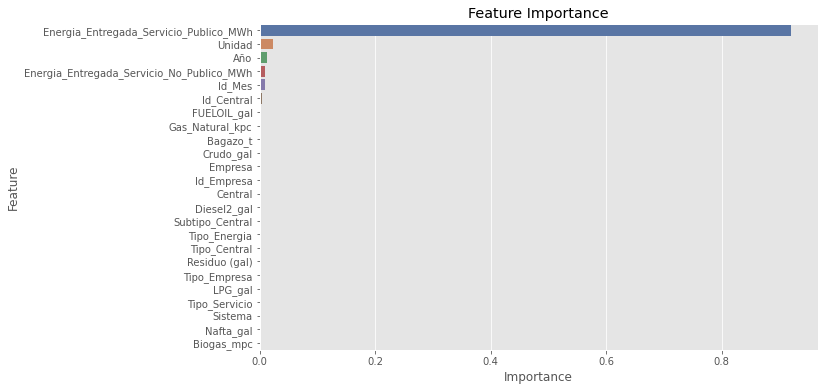

In [79]:
#Procedemos a crear gráficos para visualizar los feature importance usando seaborn. 
#Modelo 1
#se ordenan primero las importancias de la más importante a la menos de forma descendente. 

sorted_feature_importances_1 = feature_importances_1.sort_values('importance', ascending=False)

#procedemos con el gráfico 

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances_1['importance'], y=sorted_feature_importances_1['feature'], palette='deep')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

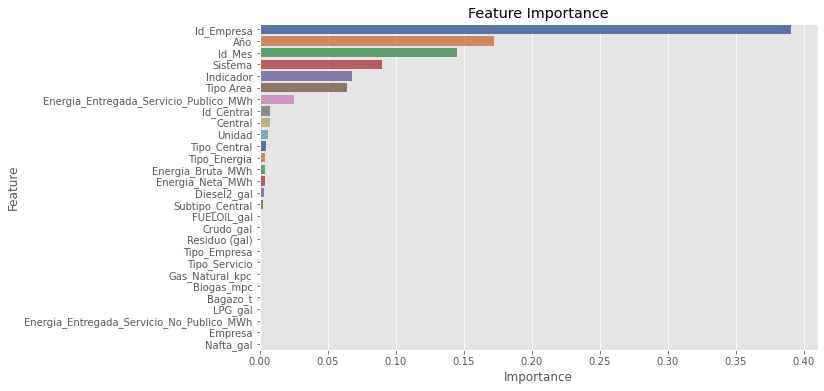

In [80]:
#Procedemos a crear gráficos para visualizar los feature importance usando seaborn. 
#Modelo 3
#se ordenan primero las importancias de la más importante a la menos de forma descendente. 

sorted_feature_importances_3 = feature_importances_3.sort_values('importance', ascending=False)

#procedemos con el gráfico 

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances_3['importance'], y=sorted_feature_importances_3['feature'], palette='deep')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# SE PROCEDE A ENTRENAR NUEVAMENTE EL MODELO CON LOS FEATURES CON MAYOR RELEVANCIA EN AMBOS CASOS

In [81]:
#Se procede a tomar las 10 y 19 principales características de cada modelo, para validar si los valores de accuracy (exactitud) y 
#desviación en ambos modelos se ajustan mejor con las predicciones. Se efectua para ambos modelos. 
top_features_1 = feature_importances_1['feature'].head(19).tolist()
top_features_3 = feature_importances_3['feature'].head(19).tolist()

In [82]:
#se generan nuevos predictores de entrenamiento y prueba para ambos modelos con las características seleccionadas para conjunto 1
X1_train_selected = X1_train[top_features_1]
X1_test_selected = X1_test[top_features_1]
#se generan nuevos predictores de entrenamiento y prueba para ambos modelos con las características seleccionadas para conjunto 3
X3_train_selected = X3_train[top_features_3]
X3_test_selected = X3_test[top_features_3]

In [83]:
#se crean nuevamente los modelos de regresión con los features seleccionados modelo 1
rf_regressor_1_selected=RandomForestRegressor()

In [84]:
rf_regressor_1_selected.fit(X1_train_selected, Y1_train)

RandomForestRegressor()

In [85]:
#se crean nuevamente los modelos de regresión con los features seleccionados modelo 3
rf_regressor_3_selected=RandomForestRegressor()

In [86]:
rf_regressor_3_selected.fit(X3_train_selected, Y3_train)

RandomForestRegressor()

# PREDICCIONES CON LOS NUEVOS FEATURES MÁS IMPORTANTES

In [87]:
#predicción modelo 1
Y1_pred_selected = rf_regressor_1_selected.predict(X1_test_selected)
#visualizamos las predicciones
Y1_pred_selected

array([ 252.5366    ,  609.05690758,  504.29048471, ...,  872.4806868 ,
       3024.48212273,   73.76001708])

In [88]:
#predicción modelo 3
Y3_pred_selected = rf_regressor_3_selected.predict(X3_test_selected)
#visualizamos las predicciones
Y3_pred_selected

array([0.88152996, 0.947386  , 0.825597  , ..., 0.7528    , 0.9109    ,
       0.94677676])

# SCORING Y PRECISIÓN CON EL MODELO AJUSTADO

In [89]:
#Error absoluto medio para el modelo 1
mae_1_selected = mean_absolute_error(Y1_test, Y1_pred_selected)
print('El error absoluto medio es: ', mae_1_selected)

El error absoluto medio es:  355.2472118251223


In [90]:
#Coeficiente de determinación modelo 1
#Disminuyendo las variables, aumenta el error absoluto, además de que el coeficiente de determinación disminuye, por tanto
#se considera que las predicciones para el modelo 1 son más acertadas cuando se usa una mayor cantidad de variables que explican
#la variabilidad de los factores. 
r2_1_selected = r2_score(Y1_test, Y1_pred_selected)
print('El coeficiente de determinación es: ', r2_1_selected)

El coeficiente de determinación es:  0.9239679228301402


In [91]:
#Error absoluto medio para el modelo 3
mae_3_selected = mean_absolute_error(Y3_test, Y3_pred_selected)
print('El error absoluto medio es: ', mae_3_selected)

El error absoluto medio es:  0.015420764666489646


In [92]:
#Coeficiente de determinación modelo 3
#Disminuyendo las variables, aumenta el error absoluto, además de que el coeficiente de determinación disminuye, por tanto
#se considera que las predicciones para el modelo 3 son también más acertadas cuando se usa una mayor cantidad de variables que 
#explican la variabilidad de los factores. Se puede relajar el modelo, y usar para predicciones con los modelos al 90% y 95% de
#confianza respectivamente. 
r2_3_selected = r2_score(Y3_test, Y3_pred_selected)
print('El coeficiente de determinación es: ', r2_3_selected)

El coeficiente de determinación es:  0.9635414856807161


# GRÁFICO DE DISPERSIÓN (SCATTER PLOT) PARA EVALUAR AMBOS MODELOS, PREVIO AL AJUSTE POR FEATURE IMPORTANCE

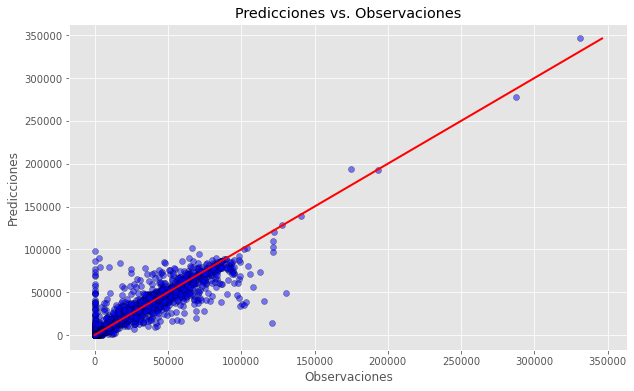

In [98]:
#Gráfico de dispersión modelo 1. 
plt.figure(figsize=(10,6))
plt.scatter(Y1_test, Y1_pred, alpha=0.5, c="blue", marker="o", edgecolors="k")
plt.xlabel('Observaciones')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Observaciones')

min_value = min(min(Y1_test), min(Y1_pred))
max_value = max(max(Y1_test), max(Y1_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'r', linestyle='-', linewidth=2)

plt.show()

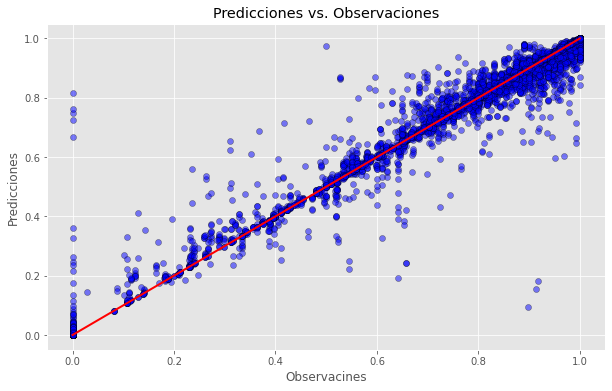

In [99]:
#Gráfico de dispersión modelo 3. 
plt.figure(figsize=(10,6))
plt.scatter(Y3_test, Y3_pred, alpha=0.5, c="blue", marker="o", edgecolors="k")
plt.xlabel('Observacines')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Observaciones')

min_value = min(min(Y3_test), min(Y3_pred))
max_value = max(max(Y3_test), max(Y3_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'r', linestyle='-', linewidth=2)

plt.show()

# PLOT INDIVIDUAL AND VOTING REGRESSION PREDICTIONS

In [103]:
#Importamos librerías adicionales para modelos complementarios y efectuar una predicción individual con un análisis más robuto 
#al previamente efectuado. Modelo 1 y 3
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [105]:
#Creamos y ajustamos modelos individuales para los modelos 1 y 3
rf1 = RandomForestRegressor(n_estimators=200, random_state=42)
gb1 = GradientBoostingRegressor(n_estimators=50, random_state=42)
lr1 = LinearRegression()

rf3 = RandomForestRegressor(n_estimators=200, random_state=42)
gb3 = GradientBoostingRegressor(n_estimators=50, random_state=42)
lr3 = LinearRegression()

In [107]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 1
rf1.fit(X1_train, Y1_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [108]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 1
gb1.fit(X1_train, Y1_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [109]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 1
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [110]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 3
rf3.fit(X3_train, Y3_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [111]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 3
gb3.fit(X3_train, Y3_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [112]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 3
lr3.fit(X3_train, Y3_train)

LinearRegression()

In [113]:
#Creamos y ajustamos el voting regressor para el modelo 1
voting1 = VotingRegressor(estimators=[('rf1', rf1), ('gb1', gb1), ('lr1', lr1)])
voting1.fit(X1_train, Y1_train)

VotingRegressor(estimators=[('rf1',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('gb1',
                             GradientBoostingRegressor(n_estimators=50,
                                                       random_state=42)),
                            ('lr1', LinearRegression())])

In [114]:
#Creamos y ajustamos el voting regressor para el modelo 3
voting3 = VotingRegressor(estimators=[('rf3', rf3), ('gb3', gb3), ('lr3', lr3)])
voting3.fit(X3_train, Y3_train)

VotingRegressor(estimators=[('rf3',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('gb3',
                             GradientBoostingRegressor(n_estimators=50,
                                                       random_state=42)),
                            ('lr3', LinearRegression())])

In [117]:
#Cálculamos las predicciones para cada modelo y el voting regressor en el modelo 1
Y1_rf1 = rf1.predict(X1_test)
Y1_gb1 = gb1.predict(X1_test)
Y1_lr1 = lr1.predict(X1_test)
Y1_voting1 = voting1.predict(X1_test)

In [119]:
#Cálculamos las predicciones para cada modelo y el voting regressor en el modelo 3
Y3_rf3 = rf3.predict(X3_test)
Y3_gb3 = gb3.predict(X3_test)
Y3_lr3 = lr3.predict(X3_test)
Y3_voting3 = voting3.predict(X3_test)

In [120]:
#Visualizamos las predicciones modelo 1
Y1_rf1

array([ 259.985     ,  595.81920668,  505.76410954, ...,  867.08795427,
       2935.6509717 ,   75.08812126])

In [121]:
#Visualizamos las predicciones modelo 1
Y1_gb1

array([ 307.37414276,  279.35379478,  236.97357342, ..., 1174.32237426,
       2046.45781541,  236.97357342])

In [122]:
#Visualizamos las predicciones modelo 1
Y1_lr1

array([ 154.07991827,  267.5015502 ,  442.77527428, ..., 1269.36042098,
       2194.76348885,  112.71597693])

In [123]:
#Visualizamos las predicciones modelo 1
Y1_voting1

array([ 240.47968701,  380.89151722,  395.17098574, ..., 1103.59024984,
       2392.29075865,  141.5925572 ])

In [124]:
#Visualizamos las predicciones modelo 3
Y3_rf3

array([0.88323361, 0.9438715 , 0.8288735 , ..., 0.7528    , 0.9116425 ,
       0.94121629])

In [125]:
#Visualizamos las predicciones modelo 3
Y3_gb3

array([0.87579152, 0.86711707, 0.87432353, ..., 0.80086298, 0.93975585,
       0.88191435])

In [126]:
#Visualizamos las predicciones modelo 3
Y3_lr3

array([0.88194706, 0.89556467, 0.89643499, ..., 0.8256416 , 0.87777797,
       0.85264465])

In [127]:
#Visualizamos las predicciones modelo 3
Y3_voting3

array([0.88032406, 0.90218441, 0.86654401, ..., 0.79310152, 0.90972544,
       0.8919251 ])

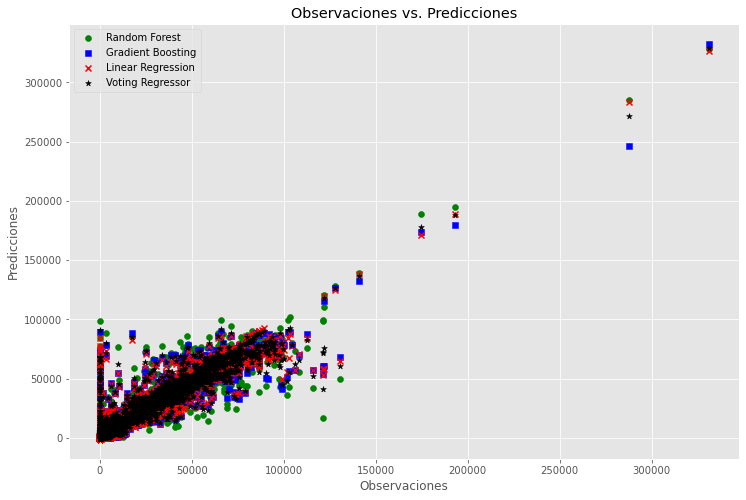

In [129]:
#procedemos a graficar predicciones contra las observaciones en el modelo 1 
plt.figure(figsize=(12, 8))

plt.scatter(Y1_test, Y1_rf1, c='g', marker='o', label='Random Forest')
plt.scatter(Y1_test, Y1_gb1, c='b', marker='s', label='Gradient Boosting')
plt.scatter(Y1_test, Y1_lr1, c='r', marker='x', label='Linear Regression')
plt.scatter(Y1_test, Y1_voting1, c='k', marker='*', label='Voting Regressor')

plt.xlabel('Observaciones')
plt.ylabel('Predicciones')
plt.legend(loc='best')
plt.title('Observaciones vs. Predicciones')

plt.show()

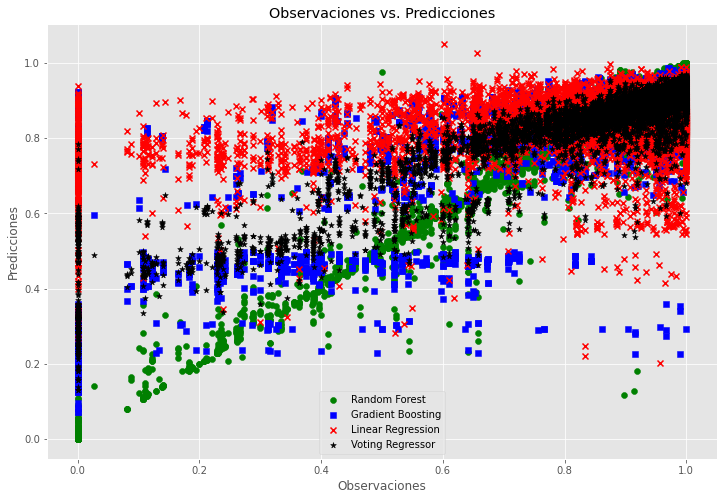

In [130]:
#procedemos a graficar predicciones contra las observaciones en el modelo 3 
plt.figure(figsize=(12, 8))

plt.scatter(Y3_test, Y3_rf3, c='g', marker='o', label='Random Forest')
plt.scatter(Y3_test, Y3_gb3, c='b', marker='s', label='Gradient Boosting')
plt.scatter(Y3_test, Y3_lr3, c='r', marker='x', label='Linear Regression')
plt.scatter(Y3_test, Y3_voting3, c='k', marker='*', label='Voting Regressor')

plt.xlabel('Observaciones')
plt.ylabel('Predicciones')
plt.legend(loc='best')
plt.title('Observaciones vs. Predicciones')

plt.show()